In [2]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [3]:
df = pd.read_csv('../../data/jacketpocket/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:22:06.503,2024-07-24 10:22:06.998,10.065231,10.055649,9.964661,9.849747,9.806656,9.682159,9.576813,...,8.853760,8.762772,8.695740,8.652649,8.595184,8.547302,8.499420,8.437164,8.398865,8.408432
1,0.0,2024-07-24 10:22:07.002,2024-07-24 10:22:07.495,8.456314,8.513779,8.590393,8.662216,8.734055,8.786728,8.825027,...,9.179367,9.203308,9.236832,9.246414,9.255981,9.255981,9.246414,9.203308,9.145843,9.145843
2,0.0,2024-07-24 10:22:07.501,2024-07-24 10:22:07.999,9.045288,8.925583,8.825027,8.757996,8.695740,8.609543,8.647858,...,8.767563,8.801086,8.829819,8.844177,8.858551,8.954315,9.078812,9.160217,9.150635,9.145843
3,0.0,2024-07-24 10:22:08.004,2024-07-24 10:22:08.496,9.279922,9.414001,9.370911,9.327805,9.337387,9.399643,9.394852,...,9.859329,9.485825,9.222458,8.939957,8.647858,8.298309,7.972687,7.948746,8.159439,8.159439
4,0.0,2024-07-24 10:22:08.501,2024-07-24 10:22:08.998,8.346191,8.580826,8.896851,9.265564,9.543289,9.682159,9.773132,...,6.354217,6.363785,6.335052,6.363785,6.363785,6.306320,6.330277,6.512222,6.813904,7.187393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,1.0,2024-07-24 11:07:59.130,2024-07-24 11:07:59.496,-9.117126,-9.117126,-9.107544,-9.107544,-9.165009,-9.141068,-9.615112,...,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589,-6.775589
4956,1.0,2024-07-24 11:08:33.626,2024-07-24 11:08:33.998,-8.355759,-8.355759,-9.701309,-9.701309,-11.444290,-12.215210,-11.587936,...,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569,-3.811569
4957,1.0,2024-07-24 11:08:51.505,2024-07-24 11:08:51.935,-6.244080,-6.555328,-6.742065,-6.861786,-6.804321,-6.698975,-6.655884,...,-3.988739,-4.065353,-3.960007,-3.960007,-3.801987,-3.634399,-3.634399,-3.634399,-3.634399,-3.634399
4958,1.0,2024-07-24 11:09:36.076,2024-07-24 11:09:36.498,-6.531387,-6.531387,-6.215347,-6.363785,-6.737289,-6.780380,-7.139511,...,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549,-5.056549


In [4]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4883
1.0      77
Name: count, dtype: int64

In [5]:
# Suppose df is your DataFrame, and df['curb_scene'] is your label column
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], 
                                                                    test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

# Now split the (train_data, train_labels) again into train and validation
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.25, 
                                                                  random_state=RANDOM_SEED)


In [6]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
val_data_scaled = scaler.transform(val_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
print(val_data_scaled.shape)
print(test_data_scaled.shape)


(2976, 100)
(992, 100)
(992, 100)


In [7]:
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
val_data_scaled_df = pd.DataFrame(val_data_scaled, columns=val_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values
val_data_scaled_df['curb_scene'] = val_data['curb_scene'].values
val_data_scaled_df['start_time'] = val_data['start_time'].values
val_data_scaled_df['end_time'] = val_data['end_time'].values

In [8]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_val_data_scaled = val_data_scaled_df[val_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
val_data_scaled = val_data_scaled_df.values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]

In [9]:
# Cast to float32
normal_train_data_scaled = normal_train_data_scaled.astype("float32")
abnormal_train_data_scaled = abnormal_train_data_scaled.astype("float32")
normal_val_data_scaled = normal_val_data_scaled.astype("float32")
abnormal_val_data_scaled = abnormal_val_data_scaled.astype("float32")
val_data_scaled = val_data_scaled.astype("float32")
normal_test_data_scaled = normal_test_data_scaled.astype("float32")
abnormal_test_data_scaled = abnormal_test_data_scaled.astype("float32")
print(normal_train_data_scaled.dtype)

float32


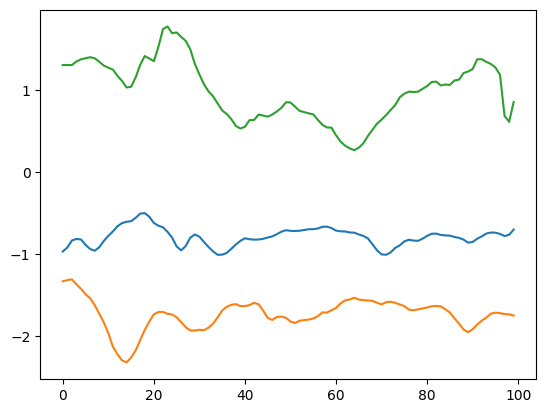

In [10]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

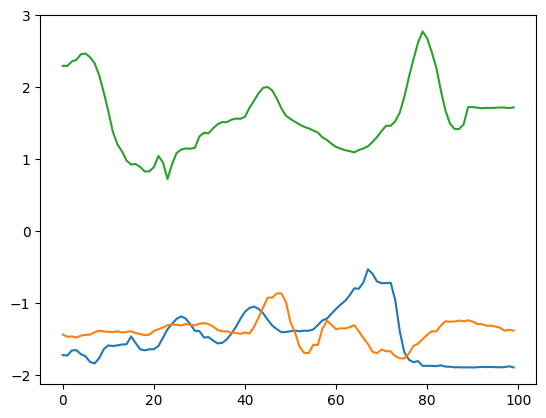

In [11]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])

In [12]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [13]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [14]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled, normal_train_data_scaled,epochs=100, batch_size=128,
                    validation_data=(val_data_scaled, val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

# Save the entire model to a file
model.save("../../models/autoencoder_jacketpocket.h5")

# load später
# from tensorflow.keras.models import load_model
# model = load_model("../../models/autoencoder_handlebar.h5")

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.9031 - val_loss: 0.8232
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7478 - val_loss: 0.6186
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5816 - val_loss: 0.5672
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5635 - val_loss: 0.5603
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5444 - val_loss: 0.5588
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5580 - val_loss: 0.5581
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5411 - val_loss: 0.5589
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5410 - val_loss: 0.5570
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5393 - val_loss: 0.5565
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5401 - val_loss: 0.5561
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5457 - val_loss: 0.5558
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss:

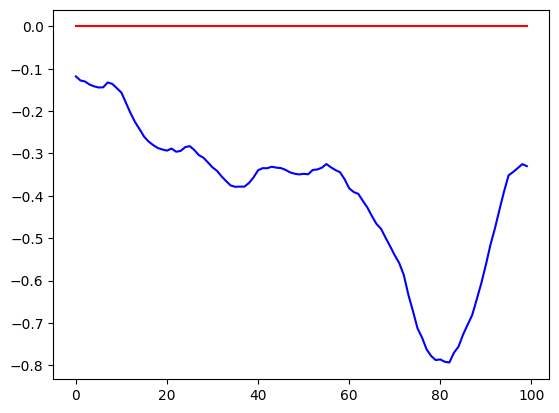

In [15]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

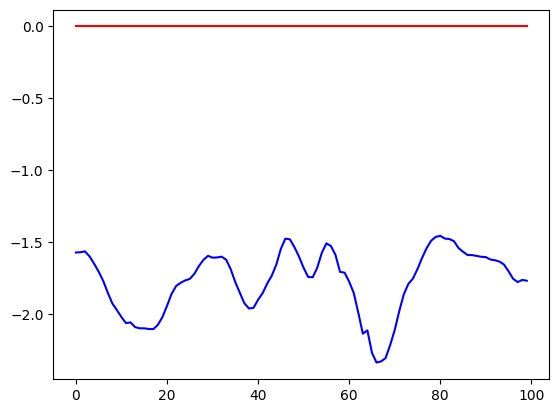

In [16]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


(array([72., 52., 62., 71., 48., 40., 39., 49., 30., 40., 22., 28., 19.,
        14., 19., 21., 22., 12., 31., 32., 22.,  8., 10., 15.,  4.,  5.,
         5.,  5.,  4.,  4.,  6., 10.,  8.,  9.,  8., 12.,  5.,  5., 10.,
        10., 12., 15., 12., 20., 13., 10.,  0.,  4.,  1.,  2.]),
 array([0.00740914, 0.04345165, 0.07949416, 0.11553666, 0.15157917,
        0.18762168, 0.22366418, 0.25970671, 0.29574922, 0.33179173,
        0.36783424, 0.40387675, 0.43991923, 0.47596174, 0.51200426,
        0.54804677, 0.58408928, 0.62013179, 0.6561743 , 0.69221681,
        0.72825933, 0.76430184, 0.80034435, 0.83638686, 0.87242931,
        0.90847182, 0.94451433, 0.98055685, 1.0165993 , 1.05264187,
        1.08868432, 1.12472689, 1.16076934, 1.1968118 , 1.23285437,
        1.26889682, 1.30493939, 1.34098184, 1.37702441, 1.41306686,
        1.44910944, 1.48515189, 1.52119446, 1.55723691, 1.59327948,
        1.62932193, 1.6653645 , 1.70140696, 1.73744941, 1.77349198,
        1.80953455]),
 <BarContainer

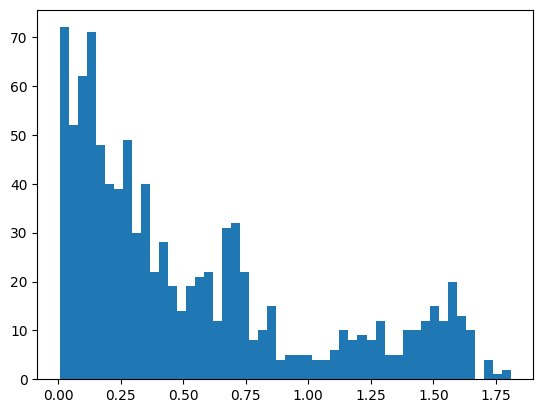

In [17]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


(array([1., 2., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([0.40366822, 0.43101153, 0.45835483, 0.48569816, 0.51304144,
        0.54038477, 0.56772804, 0.59507138, 0.62241471, 0.64975798,
        0.67710125, 0.70444459, 0.73178792, 0.75913119, 0.78647453,
        0.81381786, 0.84116113, 0.86850441, 0.89584774, 0.92319107,
        0.95053434, 0.97787768, 1.00522089, 1.03256428, 1.05990767,
        1.08725095, 1.11459422, 1.14193749, 1.16928077, 1.19662404,
        1.22396743, 1.25131071, 1.2786541 , 1.30599737, 1.33334064,
        1.36068392, 1.38802719, 1.41537046, 1.44271398, 1.47005725,
        1.49740052, 1.5247438 , 1.55208707, 1.57943034, 1.60677361,
        1.63411713, 1.6614604 , 1.68880367, 1.71614695, 1.74349022,
        1.77083361]),
 <BarContainer object of 50 artists>)

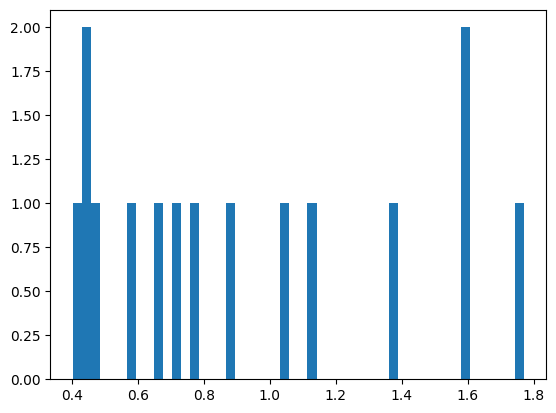

In [18]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

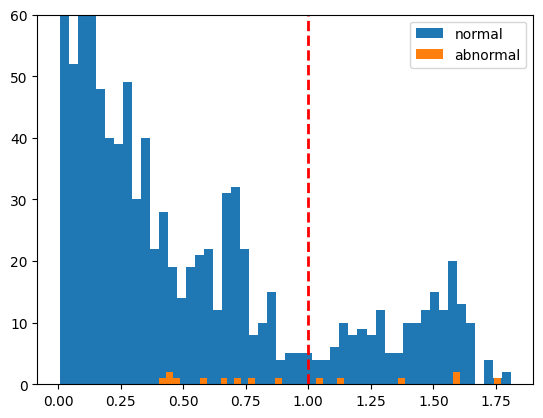

In [20]:
threadshold = 1
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [21]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  794
Accuracy:  0.812691914022518


In [22]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  6
Accuracy:  0.4
